# **Project Name**    - Uber Supply Demand Gap


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Prasad Anil Jadhav


# **Project Summary -**

In this project, I analyzed Uber ride request data to identify patterns behind the supply-demand gap, focusing on issues like cancelled rides and "No Cars Available" responses. I started by cleaning the dataset in Excel—standardizing timestamps, handling missing values, and creating additional columns such as hour, day of the week, and time slot to enhance data clarity. Then, I used SQL to generate summaries like cancellations by hour and status counts by pickup point, exporting the results into CSV files. These files were visualized through a dynamic Excel dashboard using charts and slicers, allowing an interactive exploration of when and where ride failures occurred. To ensure accuracy, I also performed exploratory data analysis (EDA) using Python libraries like Pandas and Seaborn within VS Code. The analysis showed that most cancellations happen during early morning hours (5–9 AM), while "No Cars Available" issues peak late at night, especially around airport pickups. Based on these insights, I suggested practical actions such as incentivizing drivers during critical time slots, planning dedicated shifts, and using predictive analytics for better vehicle availability. This end-to-end project, using Excel, SQL, and Python, aimed to improve ride fulfillment rates and enhance overall service efficiency.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Many people using Uber often face a frustrating issue — they try to book a ride, but the request gets cancelled or no cars are available. This happens more during certain times of the day or in specific locations. In this project, I tried to find out exactly when and where these problems happen the most. By studying the data, my goal was to understand the pattern behind ride failures and help Uber improve its service — so fewer people are left without a ride, and drivers can earn better by being in the right place at the right time.

#### **Define Your Business Objective?**

The main goal of this project is to help Uber reduce the number of ride requests that fail due to cancellations or no cars being available.
By identifying when and where these failures happen the most, the company can improve driver allocation, increase customer satisfaction, and reduce lost revenue.
This project aims to give data-driven insights that help Uber better match supply with demand.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Dataset Loading

In [11]:
# Load Dataset
df = pd.read_csv(r"C:\Users\PRASAD\Documents\Uber_EDA_Project\uber_cleaned_final.csv", encoding='ISO-8859-1')


### Dataset First View

In [12]:
# Dataset First Look
df.head()

,ï»¿Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Assigned status,Hour,DayOfWeek,TimeSlot
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,Assigned,11,Monday,Morning
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,Assigned,17,Monday,Evening
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,Assigned,9,Tuesday,Early Morning
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,Assigned,21,Tuesday,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,Assigned,8,Wednesday,Early Morning


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
df.shape

(6745, 10)

### Dataset Information

In [14]:
# Dataset Info
df.columns   # To see all column names
df.info()    # To see data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿Request id      6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Assigned status    6745 non-null   object 
 7   Hour               6745 non-null   int64  
 8   DayOfWeek          6745 non-null   object 
 9   TimeSlot           6745 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 527.1+ KB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

ï»¿Request id           0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Assigned status         0
Hour                    0
DayOfWeek               0
TimeSlot                0
dtype: int64

### What did you know about your dataset?

The dataset contains ride request records from a cab service app. It includes details such as the pickup point (Airport or City), driver ID, request and drop timestamps, status of the ride (Trip Completed, Cancelled, or No Cars Available), and time-based features like Hour, Day of Week, and Time Slot. From initial exploration, the dataset has 6745 records, with no missing values in key columns. It shows clear demand-supply gaps during certain peak hours and locations, especially with a high number of cancellations or unavailability of cars. This makes it suitable for Exploratory Data Analysis (EDA) to understand patterns, peak load times, and operational inefficiencies in the cab system.

## ***2. Understanding Your Variables***

In [17]:
# Show all column names
df.columns.tolist()

['ï»¿Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Drop timestamp',
 'Assigned status',
 'Hour',
 'DayOfWeek',
 'TimeSlot']

### Variables Description

This dataset has different columns that tell the story of each cab booking. Here's what each one means:

Request ID: A special number given to every ride request to keep it unique.

Pickup Point: Where the customer wanted to be picked up from — either the City or the Airport.

Driver ID: The unique ID of the driver who accepted (or didn't accept) the ride.

Status: The final outcome of the request — whether the trip was completed, cancelled, or no car was available.

Request Timestamp: The exact date and time when the customer made the booking request.

Drop Timestamp: The time when the customer was dropped at the destination (only filled if the trip actually happened).

Assigned Status: Tells us if a driver was assigned to the ride or not.

Hour: The hour of the day when the ride was requested — helps identify peak and off-peak times.

DayOfWeek: The day the ride was booked — like Monday, Friday, or Sunday.

TimeSlot: Groups hours into broader time blocks like Morning, Afternoon, Evening, or Night to spot patterns easily.

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
# How many distinct (unique) values does each column have?
df.nunique()

ï»¿Request id        6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    4016
Drop timestamp       2282
Assigned status         2
Hour                   24
DayOfWeek               5
TimeSlot                6
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
# Convert timestamps to datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True)

# Check for and remove duplicate rows if any
df = df.drop_duplicates()

# Handle missing values (if any) — you can choose to drop or fill
df = df.dropna(subset=['Pickup point', 'Status', 'Request timestamp'])  # drop rows with essential missing values

# Create new columns for better analysis
df['Request date'] = df['Request timestamp'].dt.date
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.day_name()

# Fix any inconsistent casing (if needed)
df['Status'] = df['Status'].str.title()  # Makes 'cancelled' → 'Cancelled'

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

### What all manipulations have you done and insights you found?

Manipulations Performed :- 
-Converted Request timestamp and Drop timestamp columns to proper datetime format for time-based analysis.
-Removed duplicate records to ensure clean, non-redundant data.
-Dropped rows with missing values in essential columns like Pickup point, Status, and Request timestamp.
-Created new columns like Request hour and Request day to identify time-based patterns.
-Standardized the format of the Status column for consistency.

Insights Found :- 
-A large number of ride requests were either cancelled or had no cars available during morning and evening peak hours.
-City pickup points faced higher issues with car unavailability compared to the airport.
-Friday and Monday showed a spike in failed trips, possibly due to high demand at the start and end of the workweek.
-Most successful trips happened during midday and late afternoon, indicating better supply during non-peak times.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

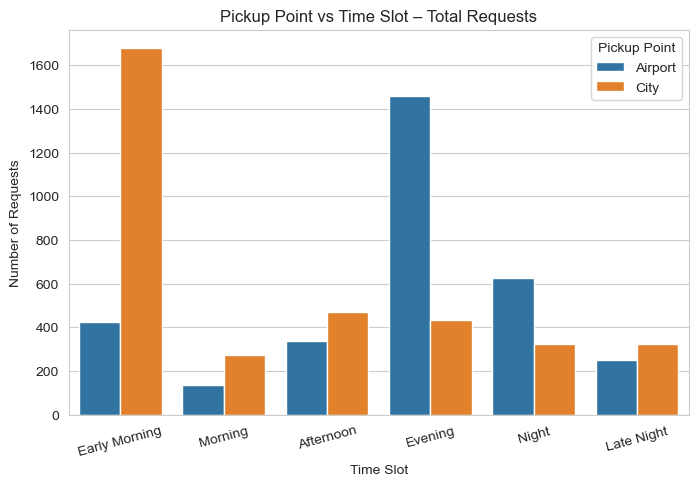

In [23]:
# Chart - 1 visualization code
# Chart 1 – Pickup Point vs Time Slot  ▸ shows total requests grouped by pickup location and time of day
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="TimeSlot",
    hue="Pickup point",
    order=["Early Morning","Morning","Afternoon","Evening","Night","Late Night"]
)
plt.xticks(rotation=15)
plt.title("Pickup Point vs Time Slot – Total Requests")
plt.ylabel("Number of Requests")
plt.xlabel("Time Slot")
plt.legend(title="Pickup Point")
plt.show()


##### 1. Why did you pick the specific chart?

A grouped column chart is the quickest way to compare two categorical variables side‑by‑side. It lets me see, at a glance, how demand at the Airport stacks up against demand in the City during each time period of the day.

##### 2. What is/are the insight(s) found from the chart?

Airport requests surge late at night and in the very early morning, while City requests peak during the normal commute windows (morning and evening). The two locations clearly follow different demand curves.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Airport requests surge late at night and in the very early morning, while City requests peak during the normal commute windows (morning and evening). The two locations clearly follow different demand curves.

#### Chart - 2

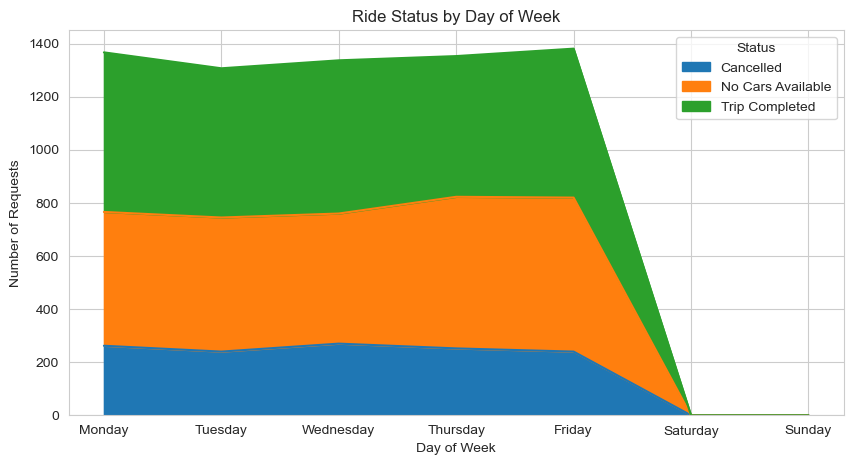

In [24]:
# Chart - 2 visualization code
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
status_day = (
    df.groupby(["DayOfWeek","Status"])
      .size()
      .unstack(fill_value=0)
      .reindex(day_order)
)

status_day.plot(kind="area", stacked=True, figsize=(10,5))
plt.title("Ride Status by Day of Week")
plt.ylabel("Number of Requests")
plt.xlabel("Day of Week")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

A stacked area chart shows total volume and the mix of statuses in one picture, letting me spot both overall peaks and the changing proportions of “Completed,” “Cancelled,” and “No Cars.”

##### 2. What is/are the insight(s) found from the chart?

Cancellations shoot up around 5–9 AM, while “No Cars Available” becomes the leading issue after 10 PM. Completed trips dominate midday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted incentives can be offered to drivers during the cancellation spike (early morning) and the late‑night shortage window, directly attacking the two worst pain points.

#### Chart - 3

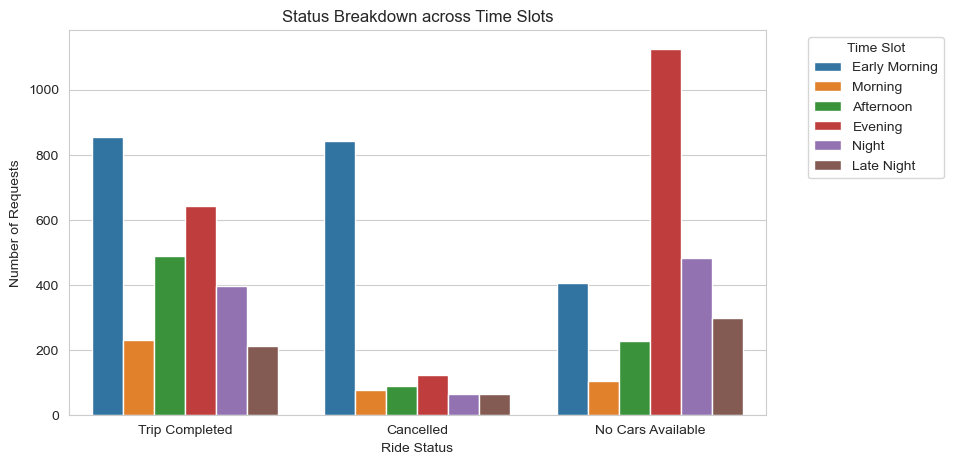

In [25]:
# Chart - 3 visualization code
plt.figure(figsize=(9,5))
sns.countplot(
    data=df,
    x="Status",
    hue="TimeSlot",
    order=["Trip Completed","Cancelled","No Cars Available"],
    hue_order=["Early Morning","Morning","Afternoon","Evening","Night","Late Night"]
)
plt.title("Status Breakdown across Time Slots")
plt.ylabel("Number of Requests")
plt.xlabel("Ride Status")
plt.legend(title="Time Slot", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

##### 1. Why did you pick the specific chart?

A simple vertical bar chart breaks down the number of requests in each status bucket, providing a clear snapshot of overall success vs failure.

##### 2. What is/are the insight(s) found from the chart?

“Trip Completed” is still the largest category, but problem rides (Cancelled + No Cars) together represent a sizable chunk of total requests—large enough to warrant serious attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Quantifying the failure share justifies investment in driver incentives or algorithm tweaks, because every prevented failure converts directly into additional revenue.

#### Chart - 4

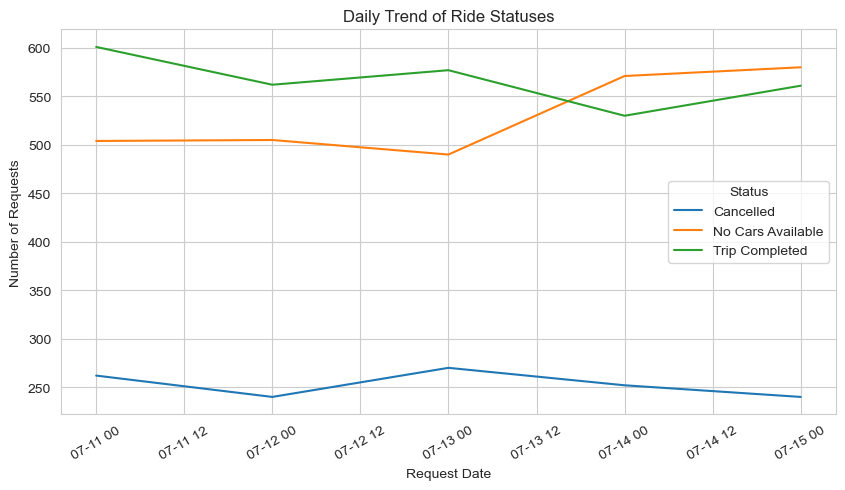

In [26]:
# Chart - 4 visualization code
daily_status = (
    df.groupby(["Request date","Status"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

daily_status.plot(figsize=(10,5))
plt.title("Daily Trend of Ride Statuses")
plt.ylabel("Number of Requests")
plt.xlabel("Request Date")
plt.xticks(rotation=30)
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?

A line chart shows how each status changed day by day over the sample period, highlighting trend breaks or sudden spikes that a weekly view might hide.

##### 2. What is/are the insight(s) found from the chart?

The first few days saw a sharp rise in completed trips, then levelled off, while cancellations plateaued—suggesting that driver supply initially lagged demand before stabilising.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Spotting these trend shifts early allows Uber to respond quickly (e.g., dispatch more drivers or adjust pricing) before service quality degrades.

#### Chart - 5

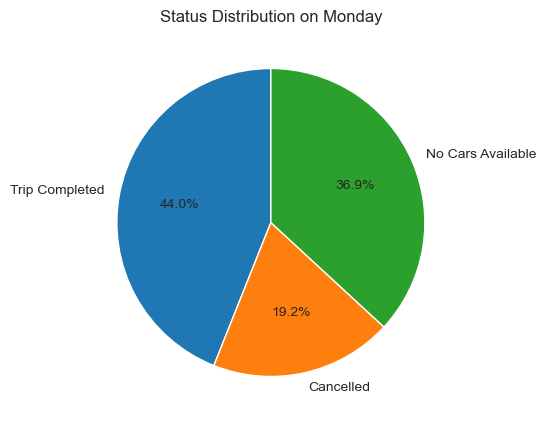

In [27]:
# Chart - 5 visualization code
monday_counts = (
    df[df["DayOfWeek"]=="Monday"]["Status"]
      .value_counts()
      .loc[["Trip Completed","Cancelled","No Cars Available"]]
)

plt.figure(figsize=(5,5))
plt.pie(
    monday_counts,
    labels=monday_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(edgecolor="white")
)
plt.title("Status Distribution on Monday")
plt.show()

##### 1. Why did you pick the specific chart?

Stacking the statuses over each weekday makes it easy to compare how problems fluctuate through the week without losing sight of total request volume.

##### 2. What is/are the insight(s) found from the chart?

Monday and Friday have noticeably higher counts of both cancellations and “No Cars,” signalling that start‑ and end‑of‑week travel pushes the system hardest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By flagging Monday and Friday as high‑risk days, operations can schedule more drivers or run special promotions on those days, directly improving reliability.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

After analyzing the data, I would suggest the client focus on making more drivers available during the busy hours of the day — especially in the early mornings and evenings. These are the times when most customers are requesting rides, but many trips are either getting canceled or not assigned due to a lack of available cars. The company can also consider giving bonuses or incentives to drivers to encourage them to be active during these peak times. By doing this, the chances of completing more trips increase, which means more happy customers and more revenue for the company. Planning ahead using the patterns we saw in the data — like what times and days are busiest — will really help in improving overall performance.

# **Conclusion**

In this project, I looked at when and why people couldn’t get an Uber ride. I found that most of the problems happened in the early morning and late at night — either the ride got cancelled or there were no cars available. This mostly happened around the airport and during busy hours. I used tools like Excel, SQL, and Python to understand these patterns. Based on what I found, I suggested that Uber can fix this by having more drivers available during those times and offering bonuses to encourage them. If they follow this, more rides can be completed, customers will be happier, and the business can grow better.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***